# Probability Distributions

A random variable is a variable whose possible values are numerical outcomes of a random phenomenon. There are two types of random variables, discrete and continuous.

In [2]:
# ---------------------------------- Import Libraries ---------------------------------
import matplotlib.pyplot as plt
from IPython.display import Math, Latex # for latex equations
from IPython.core.display import Image # for displaying images
import warnings
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
warnings.filterwarnings('ignore')

In [3]:
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

## Uniform Distribution in Python

### The probability distribution function (pdf) of the continuous uniform distribution is:

$f(x)={\begin{cases}{\frac {1}{b-a}}&\mathrm {for} \ a\leq x\leq b,\\[8pt]0&\mathrm {for} \ x<a\ \mathrm {or} \ x>b\end{cases}}$

### example: rolling a dice

In [4]:
# import uniform distribution
from scipy.stats import uniform
# random numbers from uniform distribution
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)

[Text(0.5, 0, 'Uniform Distribution '), Text(0, 0.5, 'Frequency')]

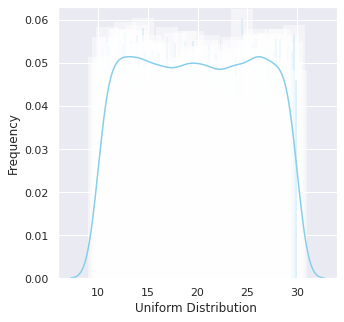

In [5]:
ax = sns.distplot(
    data_uniform,
    bins=100,
    kde=True,
    color='skyblue',
    hist_kws={"linewidth": 20, 'alpha': 0.5}
)
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')


## Normal Distribution Function

* Normal Distribution, also known as Gaussian distribution
* a bell-shaped density curve
* mean μ and standard deviation σ
* The density curve is symmetrical, centered about its mean, with its spread determined by its standard deviation showing that data near the mean are more frequent in occurrence than data far from the mean
* mean = mode = median
* ~68% between 1 SD, ~95% between 2 SD, ~99% between 3 SD  

#### pdf of normal distribution:   


${\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}$

In [6]:
from scipy.stats import norm
data_normal = norm.rvs(size=10000,loc=0,scale=1)

[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

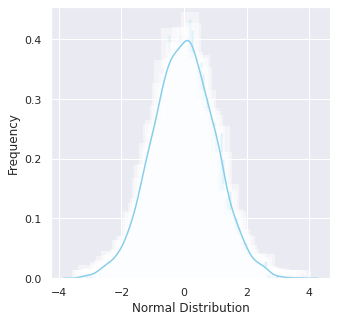

In [7]:
ax = sns.distplot(
    data_normal,
    bins=100,
    kde=True,
    color='skyblue',
    hist_kws={"linewidth": 15, 'alpha': 0.5}
)
ax.set(xlabel='Normal Distribution', ylabel='Frequency')


## T-distribution   

The t-distribution is similar to the normal distribution but is generally shorter and has fatter  
tails. It is used instead of the normal distribution when the sample sizes are small.

One thing to note is that as the sample size increases, the t-distribution converges to the normal distribution.

#### pdf of Student's t-distribution   
$\textstyle\frac{\Gamma \left(\frac{\nu+1}{2} \right)} {\sqrt{\nu\pi}\,\Gamma \left(\frac{\nu}{2} \right)} \left(1+\frac{x^2}{\nu} \right)^{-\frac{\nu+1}{2}}\!$

where ${\displaystyle \nu }$ is the number of degrees of freedom and ${\displaystyle \Gamma }$ is the gamma function.

In [8]:
from scipy.stats import t
import numpy as np

df = 10
mean, var, skew, kurt = t.stats(df, moments='mvsk')

In [9]:
data_t = t.rvs(df, size=1000)

[Text(0.5, 0, 'T Distribution'), Text(0, 0.5, 'Frequency')]

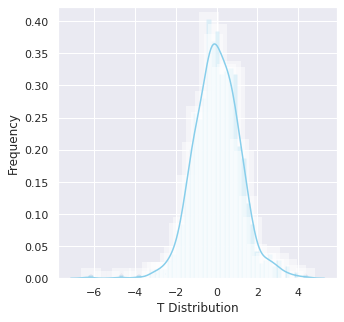

In [10]:
ax = sns.distplot(
    data_t,
    bins=50,
    kde=True,
    color='skyblue',
    hist_kws={"linewidth": 15, 'alpha': 0.5}
)
ax.set(xlabel='T Distribution', ylabel='Frequency')


## Gamma distribution   

* The Gamma distribution is used to predict the wait time until a future event occurs
* The gamma distribution predicts the wait time until the *k-th* event occurs
* It is useful when something has a natural minimum of 0.
* It’s also generalized distribution of the chi-squared distribution and the exponential distribution
* With a shape parameter k and a scale parameter θ.
* With a shape parameter α = k and an inverse scale parameter β = 1/θ, called a rate parameter.

The gamma distribution can be parameterized in terms of a shape parameter α = k and an  
inverse scale parameter β = 1/θ, called a rate parameter. A random variable X that is 
gamma-distributed with shape α and rate β is denoted:  

${\displaystyle X\sim \Gamma (\alpha ,\beta )\equiv \operatorname {Gamma} (\alpha ,\beta )}$

The corresponding probability density function in the shape-rate parametrization is: 

${\displaystyle {\begin{aligned}f(x;\alpha ,\beta )&={\frac {\beta ^{\alpha }x^{\alpha -1}e^{-\beta x}}{\Gamma (\alpha )}}\quad {\text{ for }}x>0\quad \alpha ,\beta >0,\\[6pt]\end{aligned}}}$  

where ${\displaystyle \Gamma (\alpha )}$ is the gamma function. For all positive integers, ${\displaystyle \Gamma (\alpha )=(\alpha -1)!}$ 

Assume you are waiting at a bus station. Busses are passing by at a rate of two per hour.   
You want to know the probability that you have to wait less than two hours until at least   
three busses have passed.

[0.76189669]


[Text(0.5, 0, 'Gamma Distribution'), Text(0, 0.5, 'Frequency'), (0.0, 1.0)]

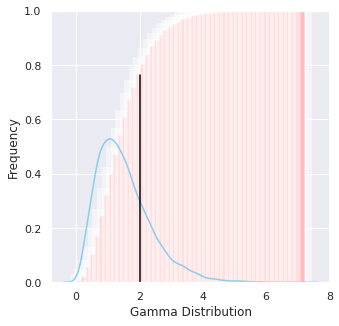

In [11]:
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt
# k : the number of events for which you are waiting to occur. => a=3
# λ : the rate of events happening following Poisson dist. => λ=2, theta=1/λ=0.5
data_gamma = gamma.rvs(a=3, scale=0.5, size=10000, random_state=1234)
print(gamma.cdf(x=[2],a=3, scale=0.5))

ax = sns.distplot(
    data_gamma,
    kde=True,
    bins=50,
    color='skyblue',
    hist_kws={"linewidth": 15, 'alpha': 0.51, 'cumulative': True, 'color': 'red'}
)
ax.axvline(x=2, ymin=0, ymax=gamma.cdf(x=[2],a=3, scale=1/2), color='black')
ax.set(xlabel='Gamma Distribution', ylabel='Frequency', ylim=(0,1))


## Poisson Distribution  

Poisson random variable is typically used to model the number of times an event happened  
in a time interval. For example, the number of users visited on a website in an interval  
can be thought of a Poisson process. Poisson distribution is described in terms of the 
rate (μ) at which the events happen. An event can occur 0, 1, 2, … times in an interval. 
The average number of events in an interval is designated λ (lambda). Lambda is the 
event rate, also called the rate parameter. The probability of observing k events in 
an interval is given by the equation:   

$\!f(k; \lambda)= \Pr(X{=}k)= \frac{\lambda^k e^{-\lambda}}{k!},$  

where  

* k is the number of occurrences ( ${\displaystyle k=0,1,2...}$)
* e is Euler's number (${\displaystyle e=2.71828...}$ )
* ! is the factorial function.

[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

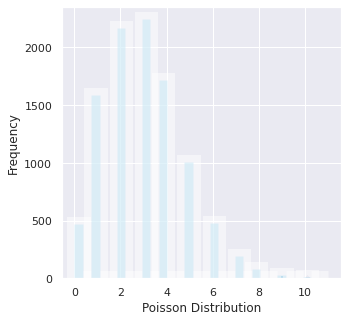

In [12]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=10000)
ax = sns.distplot(
    data_poisson,
    bins=30,
    kde=False,
    color='skyblue',
    hist_kws={"linewidth": 15, 'alpha': 0.5}
)
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')


#### On the average, there are 2 visitors entering a supershop per minute. What is the <br> probability that the supershop will have 100 customer visits within the next 1 hour?

In [13]:
# λ = 2 per minute=2×60 per 60 minutes=120 per hour
# k = 100
print(poisson.pmf(100, 120))

0.006804294803904291


## Exponential Distribution Function   

The exponential distribution describes the time between events in a Poisson point   
process, i.e., a process in which events occur continuously and independently at a   
constant average rate. It has a parameter λ called rate parameter, and its equation is described as:  

${\displaystyle f(x;\lambda )={\begin{cases}\lambda e^{-\lambda x}&x\geq 0,\\0&x<0.\end{cases}}}$

#### Suppose there is a coffee shop where customers order coffee on an average of 15 <br> times per hour. The question would be: “What is the probability that the next coffee order will arrive after 5 minutes?” 

[Text(0.5, 0, 'Exponential Distribution'),
 Text(0, 0.5, 'Frequency'),
 (0.0, 20.0)]

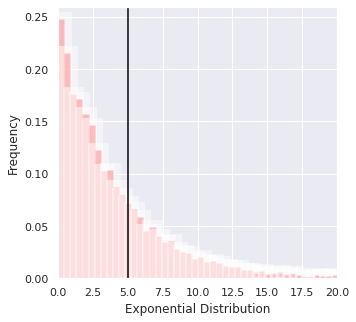

In [14]:
from scipy.stats import expon
# lambda = 0.25
# scale = 1/lambda = 1/0.25=4
data_expon = expon.rvs(scale=4, loc=0, size=10000)

ax = sns.distplot(
    data_expon,
    kde=False,
    norm_hist=True,
    bins=100,
    color='skyblue',
    hist_kws={"linewidth": 15, 'alpha': 0.51, 'cumulative': False, 'color': 'red'}
)
ax.axvline(x=5, ymin=0, ymax=1, color='black')
ax.set(
    xlabel='Exponential Distribution', ylabel='Frequency', xlim=(0, 20)
)


In [15]:
# λ = 15 per hour (60 minutes)=1/4 per hour=0.25
# k = 100
from scipy.stats import expon
print("Order exactly at 5. minute: ", expon.pdf(5 , loc=0, scale=4))
print("Order after 5 minutes: ", 1 - expon.cdf(5 , loc=0 , scale=4))

Order exactly at 5. minute:  0.07162619921504752
Order after 5 minutes:  0.28650479686019015


#### Source:  [https://www.datacamp.com/community/tutorials/probability-distributions-python](https://www.datacamp.com/community/tutorials/probability-distributions-python)